# 💳 Projeto de Detecção de Fraudes — Pré-processamento e EDA

**Disciplina:** Engenharia de Machine Learning  
**Atividade:** Limpeza, preparação e visualização dos dados (30/05/2025)  
**Alunos:**  
Anderson de Matos Guimarães  
Gustavo Stefano Thomazinho  
Leonardo Rodrigues Vianna de Medeiros Lopes  
Renan Ost

---

# 🧭 CRISP-DM – Etapas 2 e 3

## 🔎 2. Compreensão dos Dados

### 2.1 Leitura e Estrutura do Dataset


In [9]:
# Imports iniciais
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações
sns.set_theme(style='whitegrid')
%matplotlib inline


In [11]:
# Leitura dos dados
df = pd.read_csv('../data/creditcard.csv')
df_original = df.copy()  # para comparação futura

# Verificando os dados
display(df)  # Exibe o DataFrame de forma



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### 📋 Dicionário de Variáveis

O dataset contém 31 colunas. A maior parte das variáveis foi anonimizada via PCA (V1 a V28).  
Abaixo, uma breve descrição das principais variáveis:

| Coluna | Descrição |
|--------|-----------|
| `Time` | Tempo em segundos desde a primeira transação registrada |
| `Amount` | Valor da transação em euros |
| `Class` | Variável alvo: 1 = fraude, 0 = transação legítima |
| `V1` a `V28` | Componentes principais extraídos por PCA, usados para preservar a privacidade dos dados |

> Apesar de não conhecermos o significado exato de `V1` a `V28`, elas mantêm relações estatísticas que permitem análise e modelagem.

---


### 🔍 Estrutura dimensional do dataset

O comando `df.shape` retorna uma tupla contendo a quantidade de linhas (registros) e colunas (variáveis) presentes no DataFrame.  
Esse dado é fundamental para termos uma noção da escala do conjunto de dados e prever eventuais desafios de processamento.


In [13]:
df.shape # serve para ver o número de linhas e colunas



(284807, 31)

### 🔍 Visualização inicial das primeiras entradas

O método `df.head()` exibe as cinco primeiras linhas do DataFrame.  
Essa inspeção inicial é importante para compreender a estrutura tabular dos dados, conferir a ordem e tipo das colunas e avaliar se o carregamento foi realizado corretamente.


In [15]:
df.head() # Exibe as primeiras linhas do DataFrame


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 🔍 Visualização final das últimas entradas

O comando `df.tail()` retorna as cinco últimas linhas do DataFrame.  
É uma boa prática complementar ao `head()` para verificar possíveis alterações no padrão dos dados, linhas incompletas ao final ou transações com valores extremos.


In [16]:
df.tail() # Exibe as últimas linhas do DataFrame


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


### 🔍 Informações gerais sobre o DataFrame

O método `df.info()` fornece um resumo das colunas do DataFrame, incluindo:
- Quantidade de valores não nulos por coluna
- Tipo de dado de cada variável
- Memória utilizada

Essa análise é essencial para detectar valores ausentes e compreender a tipagem dos dados, o que impacta diretamente as decisões de limpeza e transformação.


In [17]:
df.info() # Exibe informações sobre o DataFrame, como tipos de dados e valores nulos


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### 📊 Estatísticas descritivas das variáveis numéricas

O comando `df.describe()` retorna medidas estatísticas para todas as colunas numéricas, como:
- Média (`mean`)
- Desvio padrão (`std`)
- Mínimo e máximo
- Quartis (25%, 50%, 75%)

Essa descrição ajuda a identificar a distribuição das variáveis, valores discrepantes (outliers) e diferenças de escala entre os atributos — aspectos fundamentais na preparação dos dados para modelos de aprendizado de máquina.


In [18]:
df.describe() # Exibe estatísticas descritivas das colunas numéricas

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### 📊 2.2 Análise de Qualidade dos Dados

Nesta etapa, buscamos compreender a integridade e a consistência do conjunto de dados.

O comando `df.isnull().sum()` permite verificar a presença de valores ausentes (nulos) em cada coluna do DataFrame. Esse diagnóstico é fundamental para identificar se será necessário realizar imputações, exclusões ou outras estratégias de tratamento.

O método `df.dtypes` retorna o tipo de dado (dtype) de cada coluna. A correta identificação dos tipos é essencial para evitar erros nas etapas de modelagem e para definir se será necessário converter colunas (por exemplo, de `object` para `datetime` ou `category`).

> Neste dataset, observamos que todas as colunas do tipo `V1` a `V28` e também `Time` e `Amount` estão corretamente como `float64`, enquanto a variável-alvo `Class` aparece como `int64`, o que é esperado. Nenhuma coluna apresenta valores nulos, o que dispensa intervenções nesta fase.



In [ ]:
# Verificação de valores ausentes
df.isnull().sum()

# Tipos de dados
df.dtypes


Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

### 2.3 Análise Visual Exploratória

Dois gráficos obrigatórios (mínimo):
- Histograma do valor das transações
- Mapa de correlação entre variáveis principais


### 📊 Distribuição do Valor das Transações (`Amount`)

A variável `Amount` representa o valor monetário de cada transação registrada no dataset. Entender a distribuição dessa variável é essencial para detectar padrões, identificar assimetrias e, principalmente, observar a presença de possíveis outliers.

Para essa análise, optamos por utilizar um **histograma**, pois esse tipo de gráfico é ideal para visualizar a frequência de ocorrência de faixas de valores numéricos contínuos. Ele nos permite identificar com clareza como os valores de `Amount` estão distribuídos no conjunto de dados.

#### 📈 Como o gráfico foi gerado:

Utilizamos o método `histplot()` da biblioteca `seaborn`, combinando com `matplotlib.pyplot` para configurar a exibição:

```python
plt.figure(figsize=(10,5))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribuição dos Valores das Transações')
plt.xlabel('Amount')
plt.ylabel('Frequência')
plt.show()
```
bins=50 define a quantidade de faixas (intervalos) de valor.

kde=True adiciona uma curva de densidade (Kernel Density Estimation), o que ajuda a visualizar a tendência da distribuição.

figsize=(10,5) define o tamanho da figura.


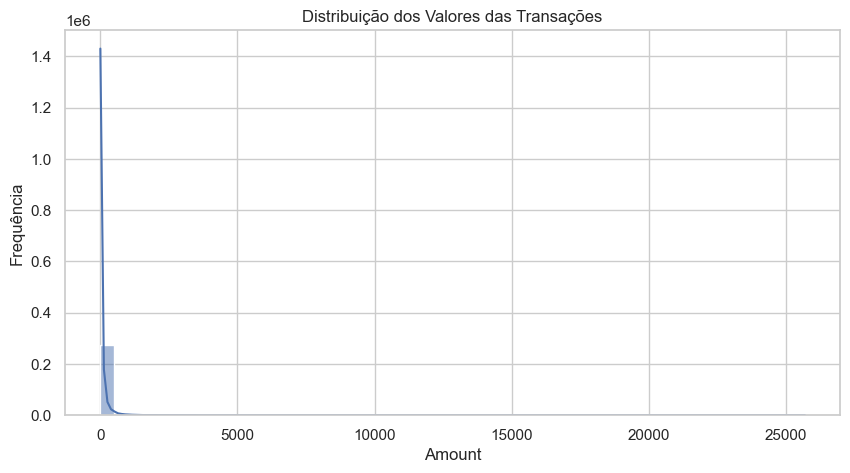

In [5]:
# Histograma do Amount
plt.figure(figsize=(10,5))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribuição dos Valores das Transações')
plt.xlabel('Amount')
plt.ylabel('Frequência')
plt.show()


#### 🧠 Interpretação do Gráfico

Observa-se uma distribuição **fortemente assimétrica**, com a grande maioria das transações ocorrendo em valores baixos, concentradas principalmente abaixo de **€ 100,00**. Esse padrão é comum em bases de dados reais do setor financeiro, onde a maior parte das transações é de pequeno valor.

Entretanto, também identificamos **valores significativamente mais altos**, alguns superando os **€ 20.000,00**, o que caracteriza a presença de **outliers**. Esses valores extremos não são necessariamente inválidos, mas devem ser analisados com cautela, pois podem influenciar algoritmos que são sensíveis à escala dos dados (como Regressão Logística, KNN e Redes Neurais).

Essa análise reforça a importância de aplicar técnicas de **normalização ou padronização** da variável `Amount`, além de justificar a utilização de outros tipos de gráficos, como o **boxplot**, para uma visualização estatística mais objetiva da dispersão e dos outliers.


### 📦 Visualização dos Outliers com Boxplot

O **boxplot** (ou gráfico de caixa) é uma ferramenta estatística que permite visualizar a mediana, os quartis e os possíveis valores discrepantes (outliers) de uma variável.

Neste caso, aplicamos o boxplot sobre a variável `Amount` para identificar transações com valores fora da faixa típica (muito acima ou abaixo da distribuição central).

Essa visualização é essencial para decidir se os outliers serão mantidos, removidos ou transformados, principalmente quando se trabalha com modelos sensíveis a distorções causadas por escala.


### 🛠️ Construção do Boxplot com Seaborn e Matplotlib

Para identificar visualmente os valores extremos (outliers) da variável `Amount`, foi construído um **boxplot** utilizando as bibliotecas `seaborn` e `matplotlib`.

O `seaborn.boxplot()` facilita a visualização da distribuição estatística dos dados, enquanto `matplotlib.pyplot` é usado para configurar aspectos do gráfico como o título, tamanho da figura e rótulo dos eixos.

A escolha por este tipo de gráfico se justifica pela sua capacidade de evidenciar, de forma objetiva, a presença de valores atípicos e a simetria (ou assimetria) da distribuição. Esse tipo de análise é fundamental para orientar decisões futuras sobre a necessidade de **tratamento de outliers** ou **normalização dos dados**.


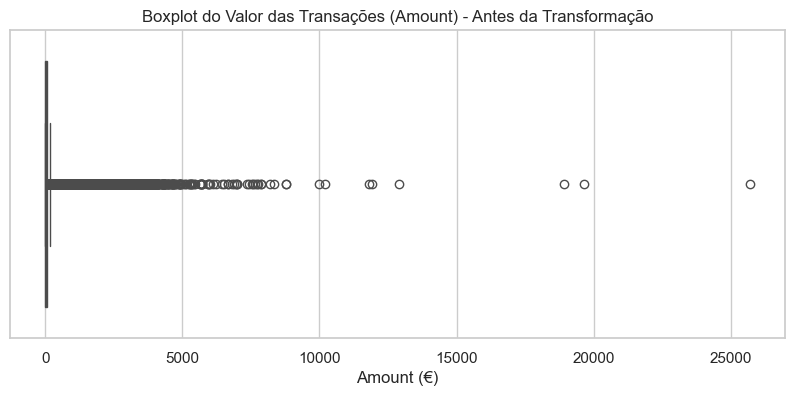

In [19]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df['Amount'])
plt.title('Boxplot do Valor das Transações (Amount) - Antes da Transformação')
plt.xlabel('Amount (€)')
plt.show()


#### 📈 Interpretação do Boxplot

O gráfico confirma visualmente o que já havia sido apontado pelo histograma: a distribuição da variável `Amount` é **fortemente assimétrica**, com **presença de outliers evidentes**.

A maioria das transações está concentrada em valores baixos, enquanto uma **minoria significativa de pontos se distancia da massa central**, chegando a valores superiores a **€ 25.000,00**. Esses valores são representados como pontos isolados à direita da caixa (acima do limite superior).

Esse comportamento reforça a necessidade de aplicar técnicas de **transformação de escala** na variável `Amount`, como a **normalização** (com `StandardScaler`) ou **transformações logarítmicas**, que permitem **reduzir o impacto dos outliers** durante a modelagem.

Na próxima etapa do projeto, esse gráfico servirá como **base de comparação com o gráfico pós-transformação**, conforme exigido na atividade pelo professor.


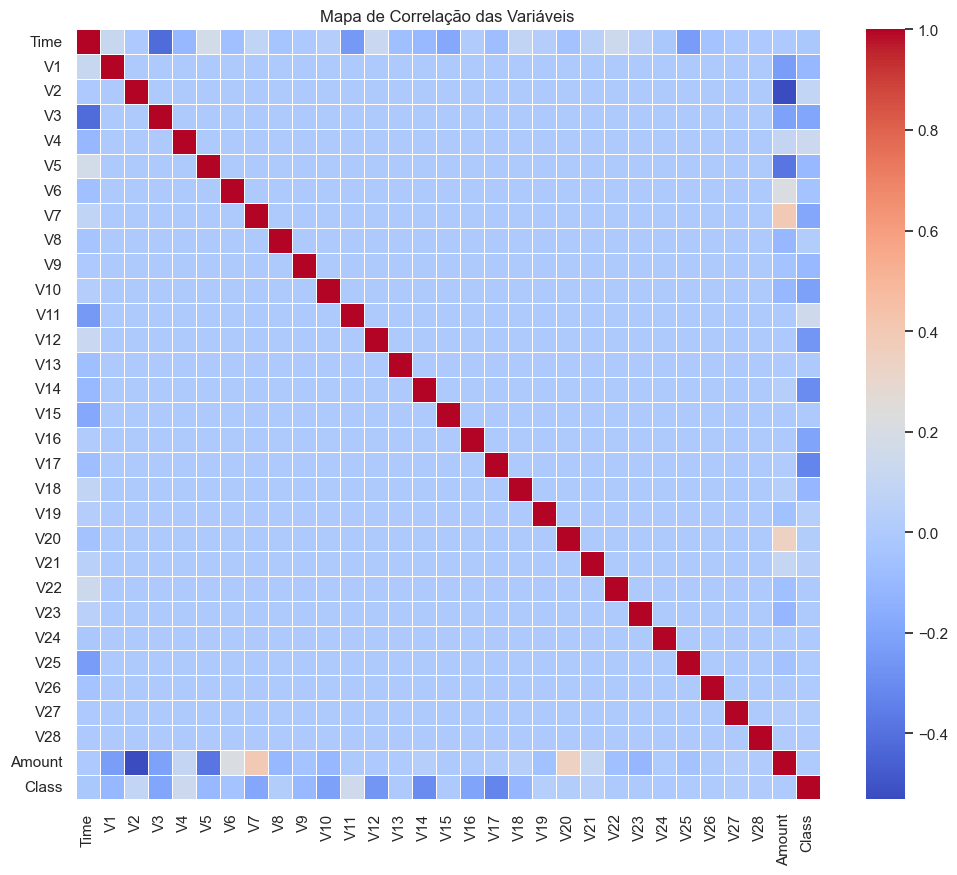

In [6]:
# Mapa de correlação
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Correlação das Variáveis')
plt.show()


## 🧹 3. Preparação dos Dados

### 3.1 Estratégias de Limpeza

Nesta seção você deve:
- Explicar suas decisões para lidar com `NaN`, `NaT` ou dados fora de padrão.
- Justificar se removeu, imputou ou manteve os valores.


In [7]:
# Se houver colunas com NaN, aplicar estratégia
# Exemplo genérico:
# df.dropna(inplace=True)  # ou df.fillna(método), etc.


### 3.2 Transformações (opcional)

Se necessário:
- Normalização do campo `Amount`
- Criação de novas colunas
- Conversão de tipo


In [8]:
# Normalização do Amount (exemplo)
from sklearn.preprocessing import StandardScaler
df['Normalized_Amount'] = StandardScaler().fit_transform(df[['Amount']])
